# SIG forestal

In [4]:
import os
import glob
# Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\GEOMATICA\Curso_suelo\04_Inventario_Forestal\Datos\Tabla")

In [6]:
lista = glob.glob("*Datos_Inventario.csv")
lista

['Datos_Inventario.csv']

In [7]:
AH_data = pd.read_csv(lista[0],delimiter=";")

In [8]:
AH_data.head(3)

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C
0,1,494028.546,9023749.586,7.862236,8.23,4.24
1,2,494033.087,9023749.028,4.647313,5.67,3.79
2,3,494042.399,9023748.940,5.634072,6.94,2.70


In [9]:
len(AH_data)

161

## Eliminar datos sin valores

In [10]:
data_clean = AH_data.dropna()

In [11]:
len(data_clean)

160

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 160
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Arbol     160 non-null    int64  
 1   Este      160 non-null    float64
 2   Norte     160 non-null    float64
 3   DAP_cm    160 non-null    float64
 4   Altura_T  160 non-null    float64
 5   Altura_C  160 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.8 KB


## Crear una geometria

In [13]:
# Create point geometries
geometria = gpd.points_from_xy(data_clean['Este'],data_clean['Norte'], crs=32718)

In [14]:
datos_shp = gpd.GeoDataFrame(data_clean, geometry=geometria)

In [15]:
datos_shp.head(3)

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry
0,1,494028.546,9023749.586,7.862236,8.23,4.24,POINT (494028.546 9023749.586)
1,2,494033.087,9023749.028,4.647313,5.67,3.79,POINT (494033.087 9023749.028)
2,3,494042.399,9023748.940,5.634072,6.94,2.70,POINT (494042.399 9023748.940)


In [16]:
print(datos_shp.crs)

EPSG:32718


In [18]:
os.getcwd()

'C:\\Users\\GEOMATICA\\Curso_suelo\\04_Inventario_Forestal\\Datos\\Tabla'

In [17]:
# Exportacion del shp 
datos_shp.to_file('Puntos_utm.shp')

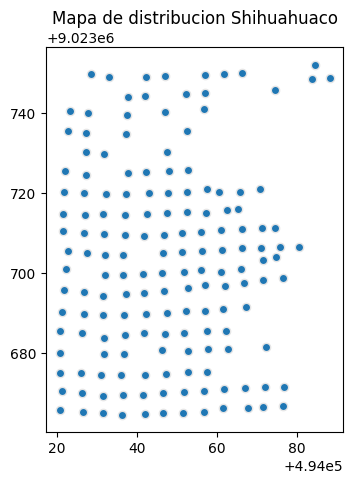

In [25]:
datos_shp.plot(edgecolor="0.9", figsize=(7, 5))
plt.title("Mapa de distribucion Shihuahuaco");

## Calcular el área basal (en metros cuadrados)

In [26]:
import numpy as np
import copy

In [36]:
Buffer_AB = copy.copy(datos_shp)

In [37]:
Buffer_AB['Area_Basal_m2'] = round((Buffer_AB['DAP_cm'] / 100)*(Buffer_AB['DAP_cm'] / 100)* np.pi/4,4)

In [38]:
Buffer_AB.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry,Area_Basal_m2
0,1,494028.546,9023749.586,7.862236,8.23,4.24,POINT (494028.546 9023749.586),0.0049
1,2,494033.087,9023749.028,4.647313,5.67,3.79,POINT (494033.087 9023749.028),0.0017
2,3,494042.399,9023748.940,5.634072,6.94,2.70,POINT (494042.399 9023748.940),0.0025
3,4,494047.100,9023749.095,6.970970,7.81,4.47,POINT (494047.100 9023749.095),0.0038
4,5,494056.927,9023749.512,8.498854,9.77,5.05,POINT (494056.927 9023749.512),0.0057


### Determinar un buffer del área basal

In [40]:
# Especificar el nombre de la columna que contiene las distancias para el buffer
campo_distancia = 'DAP_cm'

In [54]:
# Crear el buffer utilizando el campo de atributo de distancia
Buffer_AB['geometry'] = Buffer_AB.geometry.buffer(Buffer_AB[campo_distancia]/(100*2))

In [55]:
Buffer_AB.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry,Area_Basal_m2,Area_m2
0,1,494028.546,9023749.586,7.862236,8.23,4.24,"POLYGON ((494028.664 9023749.588, 494028.664 9...",0.0049,0.0194
1,2,494033.087,9023749.028,4.647313,5.67,3.79,"POLYGON ((494033.157 9023749.029, 494033.157 9...",0.0017,0.0068
2,3,494042.399,9023748.940,5.634072,6.94,2.70,"POLYGON ((494042.483 9023748.941, 494042.483 9...",0.0025,0.0100
3,4,494047.100,9023749.095,6.970970,7.81,4.47,"POLYGON ((494047.205 9023749.097, 494047.205 9...",0.0038,0.0152
4,5,494056.927,9023749.512,8.498854,9.77,5.05,"POLYGON ((494057.054 9023749.514, 494057.054 9...",0.0057,0.0227


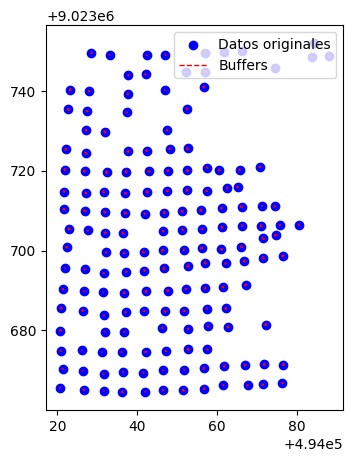

In [56]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10, 5))
# Graficar los datos originales
datos_shp.plot(ax=ax, color='blue', label='Datos originales')
# Graficar los buffers
Buffer_AB.boundary.plot(ax=ax, color='red', linewidth=1, linestyle='--', label='Buffers')
# Agregar leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

## Determinar area m2

In [57]:
Buffer_AB["Area_m2"] = round(Buffer_AB.area,4)

In [58]:
Buffer_AB.head()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry,Area_Basal_m2,Area_m2
0,1,494028.546,9023749.586,7.862236,8.23,4.24,"POLYGON ((494028.664 9023749.588, 494028.664 9...",0.0049,0.0436
1,2,494033.087,9023749.028,4.647313,5.67,3.79,"POLYGON ((494033.157 9023749.029, 494033.157 9...",0.0017,0.0153
2,3,494042.399,9023748.940,5.634072,6.94,2.70,"POLYGON ((494042.483 9023748.941, 494042.483 9...",0.0025,0.0224
3,4,494047.100,9023749.095,6.970970,7.81,4.47,"POLYGON ((494047.205 9023749.097, 494047.205 9...",0.0038,0.0343
4,5,494056.927,9023749.512,8.498854,9.77,5.05,"POLYGON ((494057.054 9023749.514, 494057.054 9...",0.0057,0.0510


In [67]:
Buffer_AB.describe()

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,Area_Basal_m2,Area_m2
count,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000
mean,81.037500,494047.190506,9.023703e+06,10.558712,10.401312,5.205938,0.009556,0.085899
std,46.764751,16.835725,2.472906e+01,3.198572,2.788527,1.572007,0.005421,0.048764
min,1.000000,494020.748000,9.023665e+06,4.329004,4.190000,2.160000,0.001500,0.013200
25%,40.750000,494031.988250,9.023683e+06,8.307869,8.635000,4.220000,0.005425,0.048750
50%,81.500000,494046.895500,9.023702e+06,10.472371,10.625000,5.115000,0.008650,0.077450
75%,121.250000,494060.676500,9.023720e+06,12.867647,12.452500,6.245000,0.013025,0.116925
max,161.000000,494088.154000,9.023752e+06,18.461930,16.220000,10.320000,0.026800,0.240700


In [68]:
Buffer_AB.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 160 entries, 0 to 160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Arbol          160 non-null    int64   
 1   Este           160 non-null    float64 
 2   Norte          160 non-null    float64 
 3   DAP_cm         160 non-null    float64 
 4   Altura_T       160 non-null    float64 
 5   Altura_C       160 non-null    float64 
 6   geometry       160 non-null    geometry
 7   Area_Basal_m2  160 non-null    float64 
 8   Area_m2        160 non-null    float64 
dtypes: float64(7), geometry(1), int64(1)
memory usage: 12.5 KB


In [60]:
# Nombre de los campos
Buffer_AB.columns

Index(['Arbol', 'Este', 'Norte', 'DAP_cm', 'Altura_T', 'Altura_C', 'geometry',
       'Area_Basal_m2', 'Area_m2'],
      dtype='object')

### Cambiar nombre de los campos de atributo

In [69]:
nombre = ['Arbol', 'Este', 'Norte', 'DAP_cm', 'Altura_T', 'Altura_C', 'geometry',
          'AB_m2', 'Area_m2']

In [70]:
# Cambiar el nombre de los campos
Buffer_AB.columns = nombre

In [71]:
type(Buffer_AB)

geopandas.geodataframe.GeoDataFrame

In [72]:
print(Buffer_AB.crs)

EPSG:32718


## Clasificacion diametrica con Shapefile

In [76]:
intervalos = [2, 7, 12, 17, 22, 27, 32]

In [77]:
Buffer_AB.head(3)

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry,AB_m2,Area_m2
0,1,494028.546,9023749.586,7.862236,8.23,4.24,"POLYGON ((494028.664 9023749.588, 494028.664 9...",0.0049,0.0436
1,2,494033.087,9023749.028,4.647313,5.67,3.79,"POLYGON ((494033.157 9023749.029, 494033.157 9...",0.0017,0.0153
2,3,494042.399,9023748.940,5.634072,6.94,2.70,"POLYGON ((494042.483 9023748.941, 494042.483 9...",0.0025,0.0224


In [78]:
# Clasificar los diámetros en categorías
Buffer_AB['cat_diam'] = pd.cut(Buffer_AB['DAP_cm'], bins=intervalos, labels=range(1, len(intervalos)))

In [79]:
Buffer_AB.head(4)

,Arbol,Este,Norte,DAP_cm,Altura_T,Altura_C,geometry,AB_m2,Area_m2,cat_diam
0,1,494028.546,9023749.586,7.862236,8.23,4.24,"POLYGON ((494028.664 9023749.588, 494028.664 9...",0.0049,0.0436,2
1,2,494033.087,9023749.028,4.647313,5.67,3.79,"POLYGON ((494033.157 9023749.029, 494033.157 9...",0.0017,0.0153,1
2,3,494042.399,9023748.940,5.634072,6.94,2.70,"POLYGON ((494042.483 9023748.941, 494042.483 9...",0.0025,0.0224,1
3,4,494047.100,9023749.095,6.970970,7.81,4.47,"POLYGON ((494047.205 9023749.097, 494047.205 9...",0.0038,0.0343,1


In [98]:
Buffer_AB["cat_diam"] = Buffer_AB["cat_diam"].astype(int)

In [99]:
# Exportacion del shp 
Buffer_AB.to_file('Buffer_AB2.shp')